# To do

Requires new scraping:
* See how positional ADP is as a predictor for positional finish next year\

Does not require new scraping:
* Compare with regression to see if regression is better than ADP or points

# Import packages and define functions

In [3]:
###################### Import Packages #############################################
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from ffb_functions import *
####################################### Functions ######################################
shifted = pd.read_csv('redraft_metrics.csv')

# Why RBs get drafted first

Why you draft RBs and WRs first
QB


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


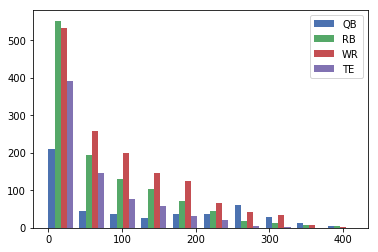

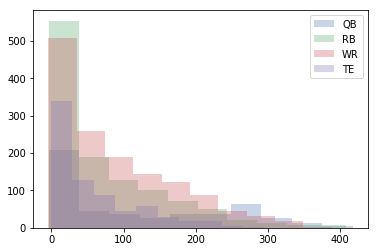



QB


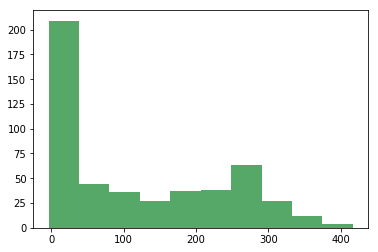



RB


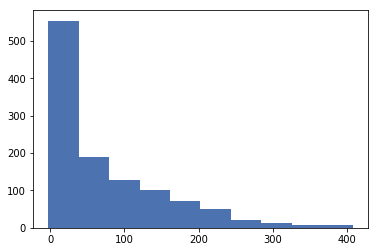



WR


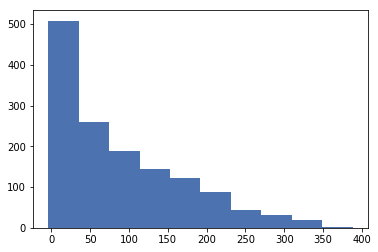



TE


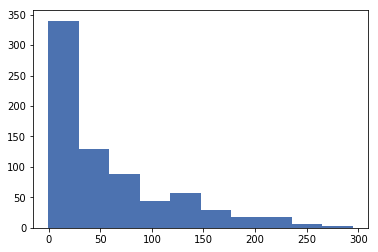

In [32]:
########## together but not on top of each other

print('Why you draft RBs and WRs first')
print('QB')
plt.style.use('seaborn-deep')

plt.hist([shifted['PPR'].loc[shifted.FantPos == 'QB'],
         shifted['PPR'].loc[shifted.FantPos == 'RB'],
         shifted['PPR'].loc[shifted.FantPos == 'WR'],
         shifted['PPR'].loc[shifted.FantPos == 'TE']], 
        #alpha = 0.3,
        label = ['QB', 'RB', 'WR', 'TE'])
plt.legend(loc='upper right')
plt.show()
#print('\n')

########### together and on top of each other

plt.hist(shifted['PPR'].loc[shifted.FantPos == 'QB'], 
        alpha = 0.3,
        label = 'QB')

#print('RB')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'RB'], 
        alpha = 0.3,
        label = 'RB')
#plt.show()
#print('\n')

#print('WR')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'WR'], 
        alpha = 0.3,
        label = 'WR')
#plt.show()
#print('\n')

#print('TE')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'TE'], 
        alpha = 0.3,
        label = 'TE')
plt.legend(loc='upper right')

plt.show()

######### separate
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'QB'], 
        alpha = 0.3,
        label = 'QB')

print('\n')
print('QB')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'QB'], 
        #alpha = 0.3,
        label = 'QB')
plt.show()
print('\n')


print('RB')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'RB'], 
        #alpha = 0.3,
        label = 'RB')
plt.show()
print('\n')

print('WR')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'WR'], 
        #alpha = 0.3,
        label = 'WR')
plt.show()
print('\n')

print('TE')
plt.hist(shifted['PPR'].loc[shifted.FantPos == 'TE'], 
        #alpha = 0.3,
        label = 'TE')
#plt.legend(loc='upper right')

plt.show()

# How good is positional ADP at predicting rank finish within a position?

# How good is points at predicting rank finish within a position

WR


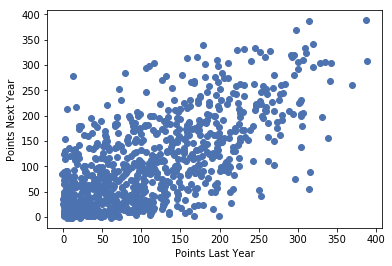



QB


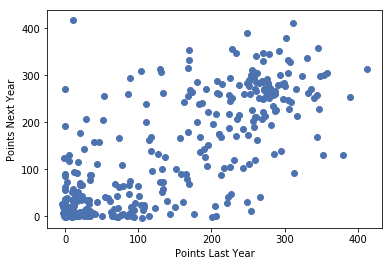



RB


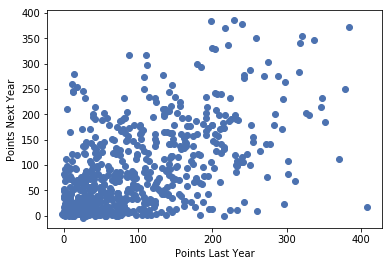



TE


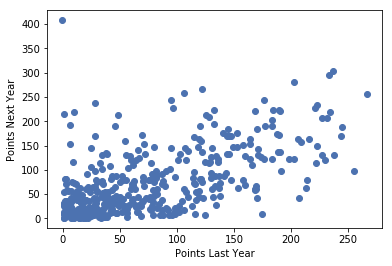

In [40]:
print('WR')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'WR'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'WR'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()
print('\n')

print('QB')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'QB'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'QB'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()
print('\n')

print('RB')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'RB'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'RB'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()
print('\n')

print('TE')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'TE'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'TE'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()

In [41]:
shifted

,Rk,Name,Tm,FantPos,Age,G,GS,Cmp,PaAtt,PaYds,...,Int_per_PaAtt,Rec_per_tgt,ReTD_per_rec,start_frac,Tgt_per_game,PaAtt_per_game,RuAtt_per_game,Tm_prev_year,Tm_change_flag,Fant_Share
0,357,A.J. Derby,2TM,TE,25.0,10.0,3.0,0.0,0.0,0.0,...,NaN,0.800000,0.000000,0.300000,2.000000,0.000000,0.000000,NaN,NaN,NaN
1,271,A.J. Derby,2TM,TE,26.0,11.0,1.0,0.0,0.0,0.0,...,NaN,0.525000,0.095238,0.090909,3.636364,0.000000,0.000000,2TM,1.0,NaN
2,388,A.J. Derby,MIA,TE,27.0,4.0,0.0,0.0,0.0,0.0,...,NaN,0.600000,0.333333,0.000000,1.250000,0.000000,0.000000,2TM,1.0,0.011645
3,13,A.J. Green,CIN,WR,24.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.591463,0.113402,1.000000,10.250000,0.000000,0.250000,NaN,NaN,0.231756
4,12,A.J. Green,CIN,WR,25.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.550562,0.112245,1.000000,11.125000,0.000000,0.000000,CIN,0.0,0.204673
5,59,A.J. Green,CIN,WR,26.0,13.0,13.0,0.0,0.0,0.0,...,NaN,0.589744,0.086957,1.000000,9.000000,0.000000,0.153846,CIN,0.0,0.157814
6,17,A.J. Green,CIN,WR,27.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.651515,0.116279,1.000000,8.250000,0.000000,0.000000,CIN,0.0,0.185547
7,101,A.J. Green,CIN,WR,28.0,10.0,10.0,0.0,0.0,0.0,...,NaN,0.660000,0.060606,1.000000,10.000000,0.000000,0.000000,CIN,0.0,0.134926
8,27,A.J. Green,CIN,WR,29.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.524476,0.106667,1.000000,8.937500,0.000000,0.000000,CIN,0.0,0.197682
9,118,A.J. Green,CIN,WR,30.0,9.0,9.0,0.0,0.0,0.0,...,NaN,0.597403,0.130435,1.000000,8.555556,0.000000,0.000000,CIN,0.0,0.113336


In [45]:
for pos in ['QB', 'RB', 'WR', 'TE']:
    print(pos)
    ycol = 'ppg_next_year'
    xcols = 'PPR'
    frame = shifted.loc[shifted.FantPos == pos].reset_index(drop = True)
    frame = frame[['Name', ycol, xcols]].dropna()
    formula = ycol + " ~ " + xcols
    model = smf.ols(formula, frame)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': frame['Name']})
    print(results.summary())
    print('\n')

QB
                            OLS Regression Results                            
Dep. Variable:          ppg_next_year   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     451.9
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           4.54e-39
Time:                        13:40:58   Log-Likelihood:                -1029.9
No. Observations:                 340   AIC:                             2064.
Df Residuals:                     338   BIC:                             2071.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0483      0.461     10.943      

# Position Rank

In [22]:
new_df = shifted[['Name', 'PosRank', 'FantPos', 'Year']].sort_values(['PosRank', 'Year']).loc[pd.notna(shifted.FantPos)].reset_index(drop = True)
new_df
newer_df = shift_col(new_df, 'PosRankNextYear', 'PosRank', -1).sort_values(['Name', 'Year'])
newer_df

,Name,PosRank,FantPos,Year,PosRankNextYear
0,A.J. Derby,62.0,TE,2016,42.0
1,A.J. Derby,42.0,TE,2017,77.0
2,A.J. Derby,77.0,TE,2018,NaN
3,A.J. Green,4.0,WR,2012,5.0
4,A.J. Green,5.0,WR,2013,23.0
5,A.J. Green,23.0,WR,2014,8.0
6,A.J. Green,8.0,WR,2015,35.0
7,A.J. Green,35.0,WR,2016,10.0
8,A.J. Green,10.0,WR,2017,37.0
9,A.J. Green,37.0,WR,2018,NaN


In [23]:
for pos in ['QB', 'RB', 'WR', 'TE']:
    print(pos)
    ycol = 'PosRankNextYear'
    xcols = 'PosRank'
    frame = newer_df.loc[newer_df.FantPos == pos].reset_index(drop = True)
    frame = frame[['Name', ycol, xcols]].dropna()
    formula = ycol + " ~ " + xcols
    model = smf.ols(formula, frame)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': frame['Name']})
    print(results.summary())
    print('\n')

QB
                            OLS Regression Results                            
Dep. Variable:        PosRankNextYear   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.03e-23
Time:                        11:13:24   Log-Likelihood:                -1575.3
No. Observations:                 358   AIC:                             3155.
Df Residuals:                     356   BIC:                             3162.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1944      2.238      5.449      

# Positional ADP

In [31]:
adp_frame = ADP_assembly(2010, 2020)
adp_frame

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,#,Bye,Graph,High,Low,Name,Overall,Pick,Pos,Std.Dev,Team,TimesDrafted,Unnamed: 10,Year
0,1,NaN,NaN,1.01,2.12,Chris Johnson,1.4,1.01,RB,1.3,TEN,422,NaN,2010
1,2,NaN,NaN,1.01,2.11,Adrian Peterson,2.3,1.02,RB,1.3,MIN,342,NaN,2010
2,3,NaN,NaN,1.01,2.10,Ray Rice,3.2,1.03,RB,1.5,BAL,203,NaN,2010
3,4,NaN,NaN,1.01,2.09,Maurice Jones-Drew,4.7,1.05,RB,1.5,JAX,325,NaN,2010
4,5,NaN,NaN,1.01,5.01,Andre Johnson,4.8,1.05,WR,2.6,HOU,427,NaN,2010
5,6,NaN,NaN,1.04,2.08,Frank Gore,6.2,1.06,RB,1.5,SF,369,NaN,2010
6,7,NaN,NaN,1.01,2.05,Aaron Rodgers,7.8,1.08,QB,2.6,GB,344,NaN,2010
7,8,NaN,NaN,1.02,5.02,Randy Moss,8.1,1.08,WR,2.9,TEN,302,NaN,2010
8,9,NaN,NaN,1.03,2.06,Michael Turner,9.1,1.09,RB,2.1,ATL,312,NaN,2010
9,10,NaN,NaN,1.05,5.03,Reggie Wayne,11.2,1.11,WR,3.2,IND,307,NaN,2010


In [34]:
adp_frame.loc[adp_frame.Year == 2019]

,#,Bye,Graph,High,Low,Name,Overall,Pick,Pos,Std.Dev,Team,TimesDrafted,Unnamed: 10,Year
1650,1,11.0,NaN,1.01,1.05,Saquon Barkley,1.4,1.01,RB,0.7,NYG,690,NaN,2019
1651,2,9.0,NaN,1.01,1.06,Alvin Kamara,2.5,1.02,RB,0.8,NO,572,NaN,2019
1652,3,7.0,NaN,1.01,1.06,Christian McCaffrey,2.5,1.03,RB,0.8,CAR,738,NaN,2019
1653,4,8.0,NaN,1.01,1.11,Ezekiel Elliott,4.6,1.05,RB,1.3,DAL,643,NaN,2019
1654,5,10.0,NaN,1.01,1.10,DeAndre Hopkins,5.1,1.05,WR,1.4,HOU,749,NaN,2019
1655,6,11.0,NaN,1.01,2.01,Davante Adams,6.8,1.07,WR,1.7,GB,676,NaN,2019
1656,7,12.0,NaN,1.01,2.05,David Johnson,7.4,1.07,RB,2.4,ARI,709,NaN,2019
1657,8,4.0,NaN,1.02,2.06,LeVeon Bell,8.4,1.08,RB,2.6,NYJ,754,NaN,2019
1658,9,9.0,NaN,1.02,2.09,Julio Jones,9.4,1.09,WR,2.0,ATL,779,NaN,2019
1659,10,9.0,NaN,1.03,2.06,Michael Thomas,9.8,1.10,WR,2.2,NO,862,NaN,2019
